<a href="https://colab.research.google.com/github/imharshmishra87/Ml-models/blob/main/softmax_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
import kagglehub
path = kagglehub.dataset_download("uciml/iris")

Using Colab cache for faster access to the 'iris' dataset.


In [227]:
import os
import pandas as pd
import numpy as np

In [228]:
os.listdir(path)

['Iris.csv', 'database.sqlite']

In [229]:
df=pd.read_csv(os.path.join(path,'Iris.csv'))

In [230]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [231]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [232]:
df.iloc[:,1:-1]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [233]:
df.iloc[:,-1]

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


# Soft Max Using SKlearn

In [234]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,1:-1],df.iloc[:,-1],test_size=0.2,random_state=42)

In [235]:
le=LabelEncoder()

In [236]:
y_train_transformed=le.fit_transform(y_train)
y_test_transformed=le.fit_transform(y_test)

In [237]:
y_train_transformed

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [238]:
lr=LogisticRegression(multi_class='multinomial')

In [239]:
lr.fit(X_train,y_train_transformed)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [240]:
lr.predict_proba([[2.8,3.9,4.5,5.6]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[4.40242606e-06, 2.51993799e-05, 9.99970398e-01]])

In [241]:
lr.predict([[2.8,3.9,4.5,5.6]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [242]:
y_pred=lr.predict(X_test)

In [243]:
print(classification_report(y_test_transformed,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

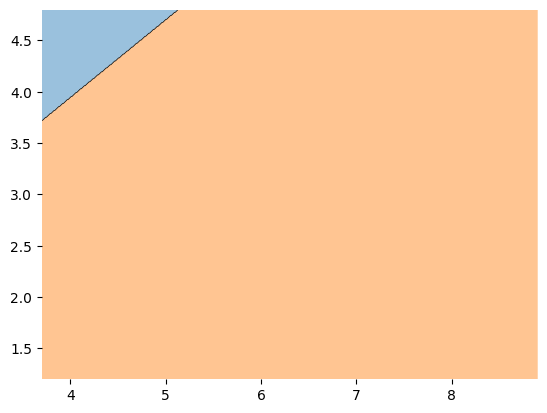

In [244]:
from mlxtend.plotting import plot_decision_regions

# Calculate mean values for the features not being plotted
# Assuming we want to plot features at index 0 (SepalLengthCm) and 1 (SepalWidthCm)
# The features at index 2 (PetalLengthCm) and 3 (PetalWidthCm) need filler values
filler_feature_values_dict = {
    2: X_train.iloc[:, 2].mean(),
    3: X_train.iloc[:, 3].mean()
}

plot_decision_regions(
    X_test.values,
    y_test_transformed,
    lr,
    legend=2,
    feature_index=[0, 1], # Plotting SepalLengthCm (index 0) and SepalWidthCm (index 1)
    filler_feature_values=filler_feature_values_dict # Filler values for PetalLengthCm and PetalWidthCm
)

In [245]:
y_train_transformed.shape

(120,)

# Soft Max Regression From Scratch

In [246]:
from sklearn.datasets import load_iris

In [247]:
X,y=load_iris(return_X_y=True)

In [248]:
from sklearn.preprocessing import OneHotEncoder
oe=OneHotEncoder()
reshaped=y.reshape(-1,1,)
encoded_y=oe.fit_transform(reshaped)

In [249]:
encoded_y.shape

(150, 3)

In [250]:
X_train,X_test,y_train,y_test=train_test_split(X,encoded_y,test_size=0.2,random_state=42)

## Actual Code (Training)

In [251]:
def activationfunction(z):
    shifted_yhat=z-np.max(z,axis=1,keepdims=True)
    exps=np.exp(shifted_yhat)
    prob=exps/np.sum(exps,axis=1,keepdims=True)
    return prob


In [252]:
epochs=1000
lr=0.1

X_train=np.insert(X_train,0,1,axis=1)
nsamples,nfeatures=X_train.shape

nclasses=y_train.shape[1] # Corrected: Use shape[1] for number of classes in one-hot encoded y_train

weights=np.ones((nfeatures,nclasses))




# size of yhat is nsmaples X nclasses

for i in range(epochs):
  z=np.dot(X_train,weights)
  ztest=np.asarray(z)
  yhat=activationfunction(ztest)
  gradient=np.dot(X_train.T,(yhat-y_train.toarray()))/nsamples # Converted y_train to dense array
  weights=weights-lr*gradient

  if i%50==0:
    epsilon=1e-9
    loss=-np.mean(np.sum(y_train.toarray()*np.log(yhat+epsilon),axis=1)) # Converted y_train to dense array
    print(loss)
    # print(f"loss is {loss} and epochs are {i}")


1.0986122856681102
0.5844238966859884
0.44258180671258657
0.3226335197684597
0.26244270811963294
0.23785976576255663
0.21883450540006189
0.2036185075329655
0.19115764855165668
0.18075653981994486
0.1719364153789151
0.16435660515089665
0.15776805426780524
0.1519844633051222
0.1468636909649912
0.14229539600163854
0.138192606404882
0.13448583422797283
0.13111888312120296
0.128045807053648


In [253]:
y_train.shape

(120, 3)

In [254]:
yhat.shape

(120, 3)

In [255]:
weights

array([[ 1.42203878,  1.60969355, -0.03173233],
       [ 1.87340729,  1.70162568, -0.57503297],
       [ 3.10608808,  0.91891893, -1.02500702],
       [-1.83478989,  0.79275799,  4.04203191],
       [-0.29607589, -0.00808715,  3.30416304]])

## Testing Code

In [259]:
X_test=np.insert(X_test,0,1,axis=1)
X_test.shape

(30, 5)

In [260]:
z_test = np.dot(X_test, weights)
# Convert z_test to ndarray if it's a matrix to avoid TypeError in activationfunction
if isinstance(z_test, np.matrix):
    z_test = np.asarray(z_test)
y_prob_pred = activationfunction(z_test)
y_pred = np.argmax(y_prob_pred, axis=1)


In [261]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [262]:
from sklearn.metrics import confusion_matrix

## Analysis

In [263]:
y_test_labels = y_test.toarray().argmax(axis=1)
print(confusion_matrix(y_test_labels, y_pred))
print(classification_report(y_test_labels, y_pred))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [264]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(120, 5)
(120, 3)
(30, 5)
(30, 3)


In [265]:
y_test.shape

(30, 3)

## Cross Check With Sklearn Model

In [266]:
from sklearn.linear_model import LogisticRegression

In [267]:
lr=LogisticRegression()
lr.fit(X_train,y_train.toarray().argmax(axis=1))

LogisticRegression()

In [268]:
y_pred1=lr.predict(X_test)

In [269]:
print(y_pred1)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [270]:
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [271]:
print(confusion_matrix(y_test_labels,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
